# Classificação de textos com spaCy

In [40]:
import pandas as pd
import string
import spacy
import random
import seaborn as srn
import numpy as np
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.training.example import Example

In [2]:
base_train = pd.read_csv('dados/base_treinamento.txt', encoding='utf-8')
print(base_train.shape)
base_train.head()

(196, 2)


,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [3]:
base_test = pd.read_csv('dados/base_teste.txt', encoding='utf-8')
print(base_test.shape)
base_test.head()

(84, 2)


,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


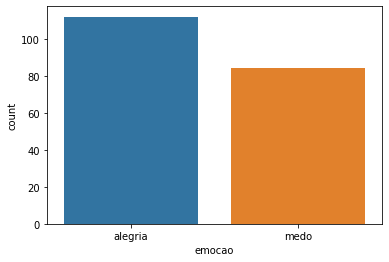

In [4]:
srn.countplot(x=base_train['emocao'], label='count');

## Pré-processamento dos textos

In [5]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
stop_words = STOP_WORDS
print(len(stop_words))
#stop_words

416


In [7]:
pln = spacy.load('pt_core_news_sm')
pln

In [8]:
teste = 'Estou aprendendo processamento de linguagem natural, online.'

In [9]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)
    
    lista = []
    for token in documento:
        lista.append(token.lemma_)
        
    # remover stop words e pontuações
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    # remover numeros e formar frase
    frase_processada = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
        
    return frase_processada

In [10]:
preprocessamento(teste)

'aprender processamento linguagem natural online'

Com a nossa base de dados:

In [11]:
base_train.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [12]:
base_train['texto'] = base_train['texto'].apply(preprocessamento)
base_train

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar aconchegar,alegria
2,adesão cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
...,...,...
191,chocar amedrontar assassinato brutal,medo
192,precisar afugentar ímpeto medo infernar,medo
193,político suar forçar parir afugentar amedrontar,medo
194,objetivo amedrontar,medo


### Tratamento da classe

In [13]:
base_dados_final = []

for texto, emocao in zip(base_train['texto'], base_train['emocao']):
        if emocao == 'alegria':
            dic = ({'ALEGRIA': True, 
                    'MEDO': False})
        elif emocao == 'medo':
            dic = ({'ALEGRIA': False, 
                    'MEDO': True})
            
        base_dados_final.append([texto, dic.copy()])
        
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['adesão cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje', {'ALEGRIA': 

## Criação do classificador

In [19]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
#modelo.add_pipe("textcat")
historico = []

In [51]:
doc.cats

{}

In [56]:
modelo.begin_training()
for epoca in range(1000):
    random.shuffle(base_dados_final)
    losses = {}
    for batch in spacy.util.minibatch(base_dados_final, 30):
        for text, annotations in batch:
            # create Example
            examples = Example.from_dict(modelo.make_doc(text), annotations)
            # Update the model
            modelo.update(examples, losses=losses)
        
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

KeyError: "[E983] Invalid key(s) for 'token_annotation': ALEGRIA. Available keys: {'LEMMA', 'deps', 'morphs', 'POS', 'pos', 'lemmas', 'HEAD', 'DEP', 'ORTH', 'SENT_START', 'words', 'tags', 'SPACY', 'heads', 'spaces', 'TAG', 'MORPH', 'sent_starts'}"